In [1]:
%pip install vaex
%pip install vaex-viz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mat
import plotly.express as px



In [3]:
# Importing Data
data = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')

In [4]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [5]:
# Checking columns and nan values
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [6]:
# Eliminating columns based on objective 
data.drop('VIN (1-10)', axis = 1, inplace = True)
data.drop('2020 Census Tract', axis = 1, inplace = True)
data.drop('DOL Vehicle ID', axis = 1, inplace = True)
data.drop('Legislative District', axis = 1, inplace = True)

In [7]:
data['Base MSRP'].duplicated().sum()

112604

In [8]:
# More than 90% duplicates 
data.drop('Base MSRP', axis = 1, inplace = True)


In [9]:
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 12 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   County                                             112634 non-null  object
 1   City                                               112634 non-null  object
 2   State                                              112634 non-null  object
 3   Postal Code                                        112634 non-null  int64 
 4   Model Year                                         112634 non-null  int64 
 5   Make                                               112634 non-null  object
 6   Model                                              112614 non-null  object
 7   Electric Vehicle Type                              112634 non-null  object
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  112634 non-null  object
 9   Elec

In [10]:
data.duplicated().sum()

75890

In [11]:
data.drop_duplicates(inplace= True)

In [12]:
data.shape

(36744, 12)

In [13]:
nan_cols=data.isna().sum()
nan_cols[nan_cols>0]

Model                19
Vehicle Location     21
Electric Utility    427
dtype: int64

In [14]:
# Erasing nans since given the size of the sample it wont affect
data = data.dropna()

In [15]:
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36282 entries, 2 to 112633
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   County                                             36282 non-null  object
 1   City                                               36282 non-null  object
 2   State                                              36282 non-null  object
 3   Postal Code                                        36282 non-null  int64 
 4   Model Year                                         36282 non-null  int64 
 5   Make                                               36282 non-null  object
 6   Model                                              36282 non-null  object
 7   Electric Vehicle Type                              36282 non-null  object
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  36282 non-null  object
 9   Electric Range  

In [16]:
lop = list(data['Electric Utility'].unique())
lop

['PACIFICORP',
 'PUGET SOUND ENERGY INC',
 'PUD NO 2 OF GRANT COUNTY',
 'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
 'AVISTA CORP',
 'MODERN ELECTRIC WATER COMPANY',
 'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
 'BONNEVILLE POWER ADMINISTRATION||CITY OF ELLENSBURG - (WA)',
 'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF GRAYS HARBOR COUNTY',
 'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
 'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY',
 'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
 'PUD NO 1 OF CHELAN COUNTY',
 'BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATION DISTRICT #15',
 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||ELMHURST MUTUAL POWER & LIGHT CO|PENINSULA LIGHT COMPANY',
 'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
 'BONNEVILLE POWER AD

In [17]:
def clean(x):
    x = str(x)
    if  'BONNEVILLE POWER ADMINISTRATION' in x :
        return 'BONNEVILLE POWER ADMINISTRATION'
    elif 'PUGET SOUND ENERGY INC' in x:
        return 'PUGET SOUND ENERGY INC'
    else:
        return x
data['Electric Utility'] = data['Electric Utility'].apply(clean)

In [18]:
data['Electric Utility'].unique()

array(['PACIFICORP', 'PUGET SOUND ENERGY INC', 'PUD NO 2 OF GRANT COUNTY',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', 'AVISTA CORP',
       'MODERN ELECTRIC WATER COMPANY', 'BONNEVILLE POWER ADMINISTRATION',
       'PUD NO 1 OF CHELAN COUNTY', 'PUD NO 1 OF DOUGLAS COUNTY',
       'PUD NO 1 OF OKANOGAN COUNTY', 'OKANOGAN COUNTY ELEC COOP, INC',
       'CITY OF TACOMA - (WA)||TANNER ELECTRIC COOP',
       'CITY OF BLAINE - (WA)||PUD NO 1 OF WHATCOM COUNTY',
       'PUD NO 1 OF WHATCOM COUNTY', 'CITY OF CHENEY - (WA)',
       'CITY OF CHEWELAH', 'PUD NO 1 OF PEND OREILLE COUNTY',
       'CITY OF SEATTLE - (WA)',
       'CITY OF SUMAS - (WA)||PUD NO 1 OF WHATCOM COUNTY',
       'CITY OF TACOMA - (WA)', 'PORTLAND GENERAL ELECTRIC CO'],
      dtype=object)

In [19]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [20]:
data['County'].unique()

array(['Yakima', 'Skagit', 'Snohomish', 'Island', 'Thurston', 'Grant',
       'King', 'Kitsap', 'Whitman', 'Spokane', 'Cowlitz', 'Pierce',
       'Kittitas', 'Grays Harbor', 'Clark', 'Chelan', 'Whatcom', 'Benton',
       'Walla Walla', 'Mason', 'San Juan', 'Lewis', 'Jefferson',
       'Clallam', 'Douglas', 'Klickitat', 'Skamania', 'Adams', 'Franklin',
       'Okanogan', 'Stevens', 'Asotin', 'Ferry', 'Pacific', 'Columbia',
       'Wahkiakum', 'Lincoln', 'Pend Oreille', 'Garfield'], dtype=object)

In [21]:
data['City'].unique()

array(['Yakima', 'Concrete', 'Everett', 'Bothell', 'Mukilteo', 'Clinton',
       'Anacortes', 'Lacey', 'Moses Lake', 'Rochester', 'Burlington',
       'Marysville', 'Lynnwood', 'Edmonds', 'Olympia', 'Seattle',
       'Auburn', 'Langley', 'Snohomish', 'Bremerton', 'Pullman',
       'Spokane', 'Suquamish', 'Monroe', 'Keyport', 'Maple Valley',
       'Kent', 'Lake Forest Park', 'Poulsbo', 'Redmond', 'Issaquah',
       'Longview', 'Tacoma', 'Ellensburg', 'Burien', 'Gig Harbor',
       'South Hill', 'Sammamish', 'Westport', 'Vancouver',
       'Airway Heights', 'Mercer Island', 'Stanwood', 'Tumwater',
       'Bainbridge Island', 'Entiat', 'Lakewood', 'Lake Tapps',
       'Bellevue', 'Kirkland', 'Newcastle', 'Port Orchard', 'Bellingham',
       'Richland', 'Camano Island', 'Wenatchee', 'Lake Stevens', 'Roy',
       'Des Moines', 'Renton', 'Camas', 'Kennewick', 'Battle Ground',
       'Bonney Lake', 'Walla Walla', 'North Bend', 'Mount Vernon',
       'Woodland', 'Woodinville', 'Allyn', 'Brier

In [22]:
data['State'].unique()

array(['WA'], dtype=object)

In [23]:
data['Make'].unique()

array(['NISSAN', 'CHEVROLET', 'FORD', 'TESLA', 'KIA', 'AUDI', 'BMW',
       'PORSCHE', 'FIAT', 'CADILLAC', 'MITSUBISHI', 'CHRYSLER', 'RIVIAN',
       'HONDA', 'HYUNDAI', 'VOLVO', 'VOLKSWAGEN', 'TOYOTA',
       'MERCEDES-BENZ', 'JEEP', 'MINI', 'SMART', 'SUBARU', 'POLESTAR',
       'LUCID MOTORS', 'LINCOLN', 'JAGUAR', 'FISKER', 'LAND ROVER',
       'LEXUS', 'TH!NK', 'GENESIS', 'BENTLEY', 'AZURE DYNAMICS'],
      dtype=object)

In [24]:
data['Model'].unique()

array(['LEAF', 'BOLT EV', 'FUSION', 'MODEL 3', 'SOUL', 'Q5 E', 'MODEL X',
       'VOLT', 'X5', '530E', 'TAYCAN', 'X3', 'A3', 'SOUL EV', 'C-MAX',
       '500', 'MODEL S', 'F-150', 'CT6', 'I3', 'MODEL Y', 'NIRO',
       'OUTLANDER', 'PACIFICA', 'R1T', 'CLARITY', 'KONA ELECTRIC', 'XC40',
       'ID.4', 'PRIUS PLUG-IN', 'MUSTANG MACH-E', 'EQB-CLASS',
       'RAV4 PRIME', 'E-GOLF', 'PRIUS PRIME', 'C40', 'SORENTO', 'XC60',
       'CAYENNE', 'WRANGLER', 'COUNTRYMAN', 'S60', 'EV6',
       'FORTWO ELECTRIC DRIVE', 'GRAND CHEROKEE', '330E', 'CROSSTREK',
       'IONIQ 5', 'IONIQ', 'E-TRON', 'ROADSTER', 'KONA', 'XC90', 'SPARK',
       'PS2', 'A7', 'HARDTOP', 'ESCAPE', 'LUCID AIR', 'E-TRON SPORTBACK',
       'Q5', 'RAV4', 'AVIATOR', 'E-TRON GT', 'EDV', 'IX', 'FORTWO',
       'I-PACE', 'SANTA FE', 'B-CLASS', 'KARMA', 'I4', 'OPTIMA',
       'GLC-CLASS', 'Q4', 'SONATA', 'EQ FORTWO', 'FOCUS',
       'RANGE ROVER SPORT', 'TRANSIT', 'PANAMERA', 'I8', 'BOLT EUV',
       'CORSAIR', 'ELR', 'GLE-CLASS', 'V60

In [25]:
data['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [26]:
data['Electric Vehicle Type']=data['Electric Vehicle Type'].replace('Plug-in Hybrid Electric Vehicle (PHEV)','Plug-in Hybrid')
data['Electric Vehicle Type']=data['Electric Vehicle Type'].replace('Battery Electric Vehicle (BEV)','Electric')

In [27]:
data['Electric Vehicle Type'].unique()

array(['Electric', 'Plug-in Hybrid'], dtype=object)

In [28]:
data['Electric Range'].unique()

array([ 73, 238,  26, 215,  75,  84,  93,  20, 293,  53, 150, 107,  14,
         0,  15, 151, 266, 192,  17,  16, 200, 220, 111,  19,  87, 249,
        31, 208, 259,  72, 239,  22, 322,  32, 291,  47,  38,   6, 203,
        42,  83,  25, 125,  21, 149, 210,  97, 289,  18,  13,  12,  68,
        30, 308, 170, 204, 245, 258, 126,  82,  29,  24, 110, 218,  41,
       265, 330, 222,  23, 103, 270,  35,  58,  33, 234,  81, 153, 114,
        10,  27,  76,  28,  40,   8, 337,  37,  62,  34, 233,   9, 124,
       100,  57,  56,  39,  48,  74,  36,  11,  59,  95])

In [29]:
data['Vehicle Location'].unique()

array(['POINT (-120.50721 46.60448)', 'POINT (-121.7515 48.53892)',
       'POINT (-122.20596 47.97659)', 'POINT (-122.18384 47.8031)',
       'POINT (-122.23019 47.94949)', 'POINT (-122.29196 47.89908)',
       'POINT (-122.35803 47.9796)', 'POINT (-122.61214 48.51748)',
       'POINT (-122.75379 47.06316)', 'POINT (-119.2771 47.13196)',
       'POINT (-123.08743 46.82175)', 'POINT (-122.33029 48.46846)',
       'POINT (-122.19388 48.15353)', 'POINT (-122.27734 47.83785)',
       'POINT (-122.31768 47.87166)', 'POINT (-122.92333 47.03779)',
       'POINT (-122.27981 47.85727)', 'POINT (-122.3026 47.72656)',
       'POINT (-122.23035 47.3074)', 'POINT (-122.31765 47.70013)',
       'POINT (-122.37689 47.81116)', 'POINT (-122.40618 48.0399)',
       'POINT (-122.82324 47.04437)', 'POINT (-122.89166 47.03956)',
       'POINT (-122.18637 47.89252)', 'POINT (-122.1389 47.87115)',
       'POINT (-122.66122 47.56573)', 'POINT (-122.29245 47.82557)',
       'POINT (-122.25527 47.90456)', 'POI

In [30]:
data['Vehicle Location']= data['Vehicle Location'].str.replace('POINT','')

In [31]:
data['Vehicle Location'].unique()

array([' (-120.50721 46.60448)', ' (-121.7515 48.53892)',
       ' (-122.20596 47.97659)', ' (-122.18384 47.8031)',
       ' (-122.23019 47.94949)', ' (-122.29196 47.89908)',
       ' (-122.35803 47.9796)', ' (-122.61214 48.51748)',
       ' (-122.75379 47.06316)', ' (-119.2771 47.13196)',
       ' (-123.08743 46.82175)', ' (-122.33029 48.46846)',
       ' (-122.19388 48.15353)', ' (-122.27734 47.83785)',
       ' (-122.31768 47.87166)', ' (-122.92333 47.03779)',
       ' (-122.27981 47.85727)', ' (-122.3026 47.72656)',
       ' (-122.23035 47.3074)', ' (-122.31765 47.70013)',
       ' (-122.37689 47.81116)', ' (-122.40618 48.0399)',
       ' (-122.82324 47.04437)', ' (-122.89166 47.03956)',
       ' (-122.18637 47.89252)', ' (-122.1389 47.87115)',
       ' (-122.66122 47.56573)', ' (-122.29245 47.82557)',
       ' (-122.25527 47.90456)', ' (-120.52301 46.60138)',
       ' (-120.56916 46.58514)', ' (-117.18147 46.73015)',
       ' (-117.45674 47.69963)', ' (-122.55242 47.73162)',
     

In [32]:
data[['Latitude', 'Longitude']] = data['Vehicle Location'].str.strip('POINT ()').str.split(expand=True)

In [33]:
data

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location,Electric Utility,Latitude,Longitude
2,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Electric,Clean Alternative Fuel Vehicle Eligible,73,(-120.50721 46.60448),PACIFICORP,-120.50721,46.60448
3,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Electric,Clean Alternative Fuel Vehicle Eligible,238,(-121.7515 48.53892),PUGET SOUND ENERGY INC,-121.7515,48.53892
4,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid,Not eligible due to low battery range,26,(-122.20596 47.97659),PUGET SOUND ENERGY INC,-122.20596,47.97659
5,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Electric,Clean Alternative Fuel Vehicle Eligible,215,(-122.18384 47.8031),PUGET SOUND ENERGY INC,-122.18384,47.8031
6,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Electric,Clean Alternative Fuel Vehicle Eligible,75,(-122.23019 47.94949),PUGET SOUND ENERGY INC,-122.23019,47.94949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112608,Kitsap,Gig Harbor,WA,98329,2018,TESLA,MODEL 3,Electric,Clean Alternative Fuel Vehicle Eligible,215,(-122.72457 47.38165),PUGET SOUND ENERGY INC,-122.72457,47.38165
112613,King,Seattle,WA,98133,2019,SMART,EQ FORTWO,Electric,Clean Alternative Fuel Vehicle Eligible,58,(-122.3503 47.71868),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.3503,47.71868
112624,Kitsap,Bainbridge Island,WA,98110,2018,MERCEDES-BENZ,C-CLASS,Plug-in Hybrid,Not eligible due to low battery range,8,(-122.521 47.62728),PUGET SOUND ENERGY INC,-122.521,47.62728
112628,King,Seattle,WA,98177,2020,AUDI,Q5 E,Plug-in Hybrid,Not eligible due to low battery range,20,(-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.36498,47.72238


In [34]:
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36282 entries, 2 to 112633
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   County                                             36282 non-null  object
 1   City                                               36282 non-null  object
 2   State                                              36282 non-null  object
 3   Postal Code                                        36282 non-null  int64 
 4   Model Year                                         36282 non-null  int64 
 5   Make                                               36282 non-null  object
 6   Model                                              36282 non-null  object
 7   Electric Vehicle Type                              36282 non-null  object
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  36282 non-null  object
 9   Electric Range  

In [35]:
import vaex

import pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [36]:
data.Latitude=data.Latitude.astype('float')
data.Longitude= data.Longitude.astype('float')

In [37]:
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36282 entries, 2 to 112633
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   County                                             36282 non-null  object 
 1   City                                               36282 non-null  object 
 2   State                                              36282 non-null  object 
 3   Postal Code                                        36282 non-null  int64  
 4   Model Year                                         36282 non-null  int64  
 5   Make                                               36282 non-null  object 
 6   Model                                              36282 non-null  object 
 7   Electric Vehicle Type                              36282 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  36282 non-null  object 
 9   Elect

In [53]:
data.to_csv('data/Clean_Electric_Vehicle_Population_Data.csv', index=False)

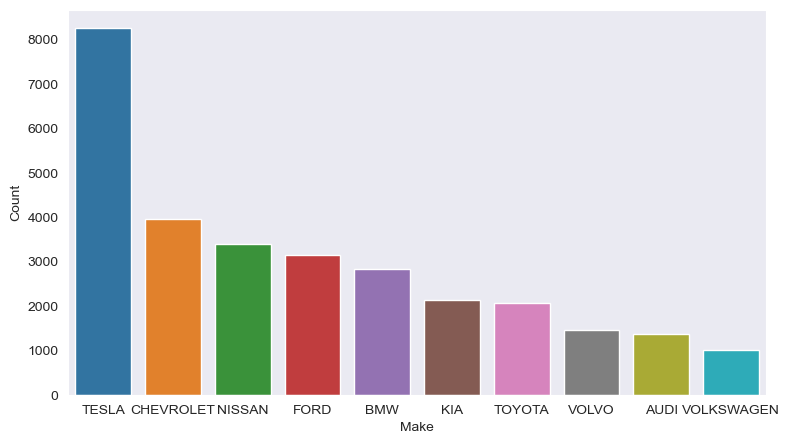

In [66]:
Companies = data.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = data.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=Companies[:10],y=values[:10])

plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

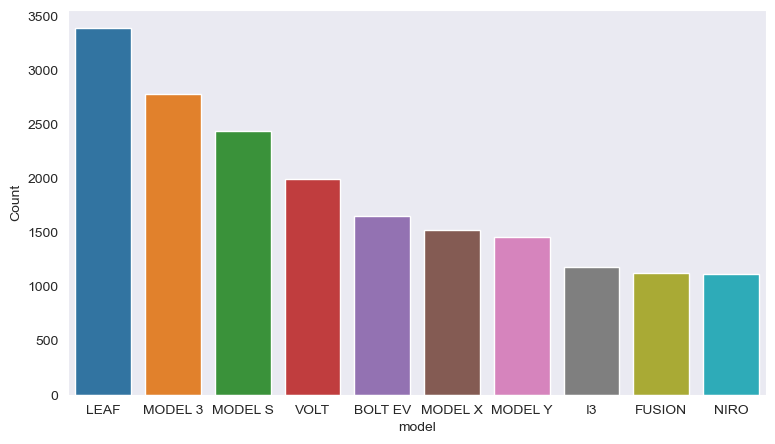

In [67]:
modelos = data.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = data.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=modelos[:10],y=values[:10])

plt.xlabel('model')
plt.ylabel('Count')
plt.show()

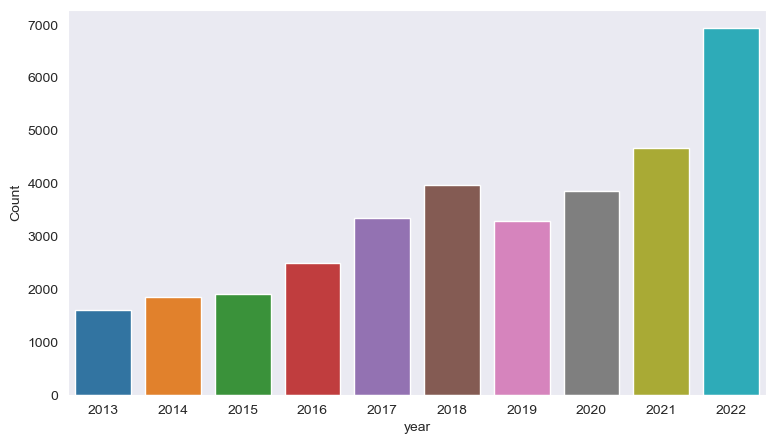

In [71]:
año = data.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].index
values = data.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=año[:10],y=values[:10])

plt.xlabel('year')
plt.ylabel('Count')
plt.show()

In [77]:

px.pie(names=Companies[:10],values=values[:10],width=600,height=600)


In [81]:

Vehicle_type = data.groupby('Electric Vehicle Type').count()['City'].index
values = data.groupby('Electric Vehicle Type').count()['City'].values

px.pie(names=Vehicle_type,values=values,width=600,height=600)

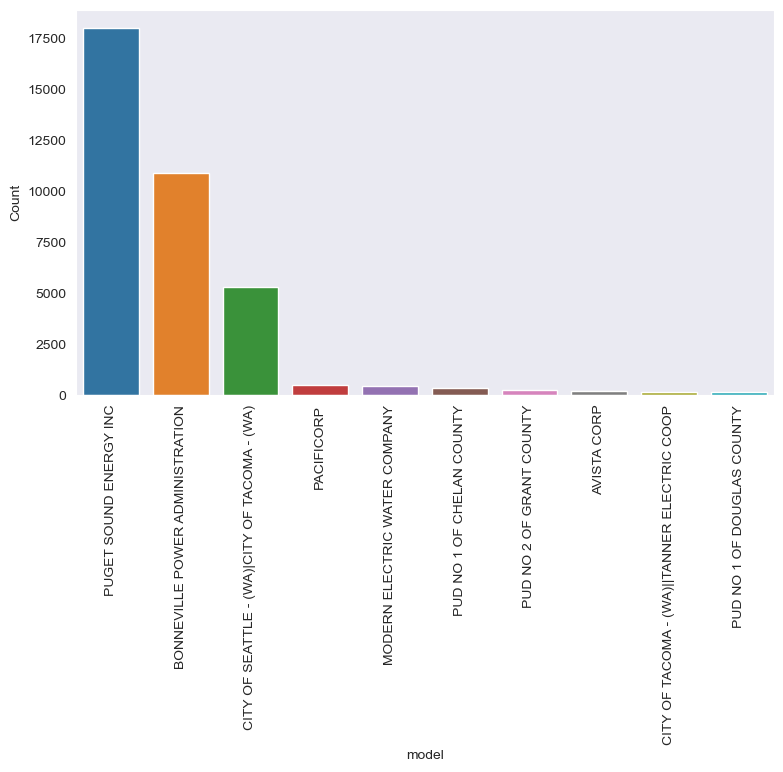

In [84]:
modelos = data.groupby('Electric Utility').count().sort_values(by='City',ascending=False)['City'].index
values = data.groupby('Electric Utility').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=modelos[:10],y=values[:10])
plt.xticks(rotation= 90)
plt.xlabel('model')
plt.ylabel('Count')
plt.show()